**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('letterdata.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Размер набора данных
data.shape

(20000, 17)

In [4]:
# Типы данных в колонках
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [5]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [6]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


### Преообразование категориальных признаков в числовые

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [10]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [11]:
X = data.drop(['width', 'letter', 'onpix', 'xbar',  'ybar',  'x2bar',  'y2bar',  'xybar',  'x2ybar',  'xy2bar',  'xedge',  'xedgey',  'yedge',  'yedgex'], axis = 1)
Y = data.width
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    xbox  ybox  height
0     2     8       5
1     5    12       7
2     4    11       8
3     7    11       6
4     2     1       1 

Выходные данные:

 0    3
1    3
2    6
3    6
4    3
Name: width, dtype: int64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [12]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        xbox  ybox  height
17964     3     6       5
11632     2     1       1
10869     4     9       7
9179      4    10       8
8871      4     8       6 

Входные параметры тестовой выборки:

        xbox  ybox  height
19134     3     3       2
4981      3     5       4
16643     4     8       5
19117     5    10       7
5306      4     7       8 

Выходные параметры обучающей выборки:

 17964    5
11632    2
10869    4
9179     5
8871     5
Name: width, dtype: int64 

Выходные параметры тестовой выборки:

 19134    4
4981     6
16643    4
19117    7
5306     4
Name: width, dtype: int64


Проверим:

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18000, 3)
(2000, 3)
(18000,)
(2000,)


<AxesSubplot:>

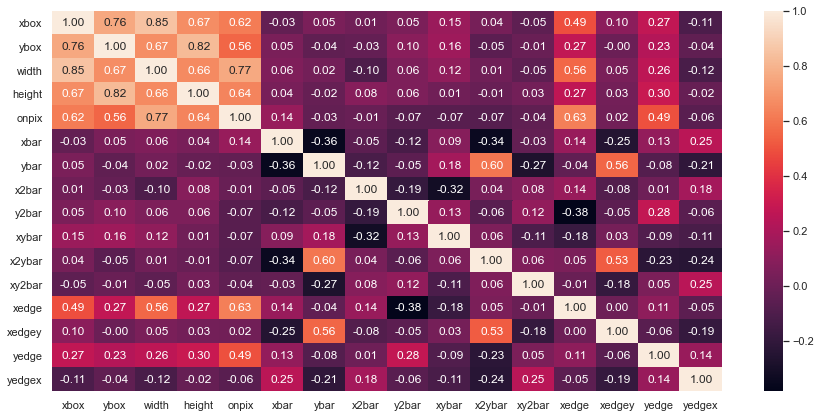

In [14]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев 

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
# предсказываем значения
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)
Y_predict = forest_1.predict(X_test)

In [17]:
# оценим предсказание
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.6508392965288694
Средняя квадратичная ошибка: 0.6560432684278356
Median absolute error: 0.5365963465421117
Коэффициент детерминации: 0.8338153947778956


**Построим график по полученным значениям**

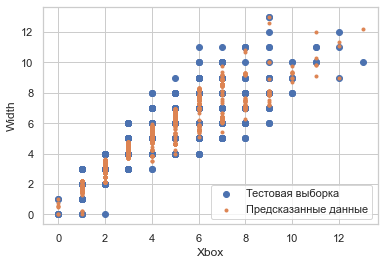

In [18]:
# построим график для визуального сравнения
plt.scatter(X_test.xbox, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.xbox, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Xbox')
plt.ylabel('Width')
plt.show()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

### 1.2. Нахождение лучшего случайного леса

In [19]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [20]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [21]:
# найдем лучшие параметры
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 0.6945457917385651
Параметры для данного показателя:
 {'max_features': 0.8, 'n_estimators': 75}


In [22]:
# предсказываем значения
forest_3 = RandomForestRegressor(n_estimators=75, max_features = 0.8, oob_score=True, random_state=10)
forest_3.fit(X, Y)
Y_predict3 = forest_3.predict(X_test)

In [23]:
# оценим предсказание
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 0.6506314147211842
Средняя квадратичная ошибка: 0.6518545003531846
Median absolute error: 0.5241401178446781
Коэффициент детерминации: 0.8348764662077129


**Построим график по полученным значениям**

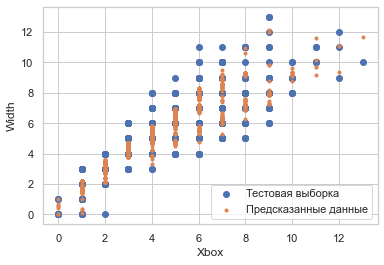

In [24]:
# построим график для визуального сравнения
plt.scatter (X_test.xbox, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.xbox, Y_predict3, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Xbox')
plt.ylabel ('Width')
plt.show ()

Показатели точности стали сильно лучше

На графике видно хорошее совпадение тестовой выборки и предсказанных данных

## 2. Градиентный бустинг

### 2.1. Построение случайного градиентного бустинга

Построим ансамбль из 5 моделей 

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
# предсказываем значения
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)
Y_grad_pred = grad.predict(X_test)

In [27]:
# оценим предсказание
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 1.0978135621222465
Средняя квадратичная ошибка: 1.9918842979834392
Median absolute error: 0.8249463745494108
Коэффициент детерминации: 0.49542885105466394


**Построим график по полученным значениям**

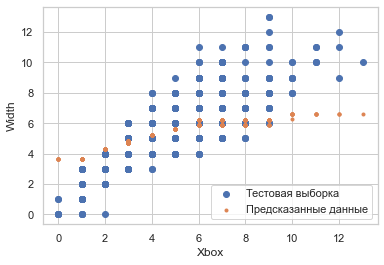

In [28]:
# построим график для визуального сравнения
plt.scatter (X_test.xbox, Y_test,      marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.xbox, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Xbox')
plt.ylabel ('Width')
plt.show ()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

### 2.2. Построение лучшего случайного градиентного бустинга

In [29]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [30]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [31]:
# найдем лучшие параметры
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 0.7589667032795534
Параметры для данного показателя:
 {'max_features': 0.8, 'min_samples_leaf': 0.01, 'n_estimators': 100}


In [32]:
# предсказываем значения
grad1 = GradientBoostingRegressor(n_estimators=100, max_features = 0.8, min_samples_leaf = 0.01, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

In [33]:
# оценим предсказание
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 0.691994537621164
Средняя квадратичная ошибка: 0.7446227771176452
Median absolute error: 0.5388123783932972
Коэффициент детерминации: 0.8113770109230306


**Построим график по полученным значениям**

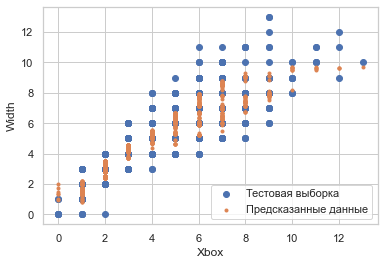

In [34]:
# построим график для визуального сравнения
plt.scatter (X_test.xbox, Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.xbox, Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Xbox')
plt.ylabel ('Width')
plt.show()

Показатели точности стали сильно лучше

На графике видно хорошее совпадение тестовой выборки и предсказанных данных